In [ ]:
# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv("dataset2.csv")

In [3]:
df

,Unnamed: 0,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,...,constant_per,pifs_activated,cw_adaptation,cont_wind,cont_wind_stage,RSSI,SINR,throughput,airtime,interference_map
0,0,AP_A,0,A,10.0000,10.0000,0,5.0,4,4,...,0.0,0,0,16,5,inf,inf,111.77,"[95.8, 95.69]","Inf,-79.34,-103.96,-119.98,-82.35,-94.85,-111...."
1,1,STA_A1,1,A,0.0713,10.8079,0,5.0,4,4,...,0.0,0,0,16,5,-65.37,29.36,5.79,"[95.8, 95.69]",NaN
2,2,STA_A2,1,A,1.9627,4.1427,0,5.0,4,4,...,0.0,0,0,16,5,-65.35,29.48,6.11,"[95.8, 95.69]",NaN
3,3,STA_A3,1,A,13.7849,16.7538,0,5.0,4,4,...,0.0,0,0,16,5,-61.41,31.97,6.91,"[95.8, 95.69]",NaN
4,4,STA_A4,1,A,6.7112,1.7487,0,5.0,4,4,...,0.0,0,0,16,5,-63.52,31.26,9.99,"[95.8, 95.69]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78073,78073,STA_H5,1,H,24.1359,33.5025,0,5.0,4,0,...,0.0,0,0,16,5,-60.91,20.98,3.99,"[72.09, 40.79, 40.79, 40.79]",NaN
78074,78074,STA_H6,1,H,31.7151,27.9136,0,5.0,4,0,...,0.0,0,0,16,5,-63.54,18.54,9.60,"[72.09, 40.79, 40.79, 40.79]",NaN
78075,78075,STA_H7,1,H,25.6285,29.0904,0,5.0,4,0,...,0.0,0,0,16,5,-63.65,16.51,2.92,"[72.09, 40.79, 40.79, 40.79]",NaN
78076,78076,STA_H8,1,H,31.1102,32.1255,0,5.0,4,0,...,0.0,0,0,16,5,-52.59,31.73,14.05,"[72.09, 40.79, 40.79, 40.79]",NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'node_code', 'node_type', 'wlan_code', 'x(m)', 'y(m)',
       'z(m)', 'central_freq(GHz)', 'channel_bonding_model', 'primary_channel',
       'min_channel_allowed', 'max_channel_allowed', 'tpc_default(dBm)',
       'cca_default(dBm)', 'traffic_model', 'traffic_load[pkt/s]',
       'packet_length', 'num_packets_aggregated', 'capture_effect_model',
       'capture_effect_thr', 'constant_per', 'pifs_activated', 'cw_adaptation',
       'cont_wind', 'cont_wind_stage', 'RSSI', 'SINR', 'throughput', 'airtime',
       'interference_map'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', 1)

C:\Users\spoor\AppData\Local\Temp/ipykernel_20736/3812631323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)


In [6]:
df

,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,min_channel_allowed,...,constant_per,pifs_activated,cw_adaptation,cont_wind,cont_wind_stage,RSSI,SINR,throughput,airtime,interference_map
0,AP_A,0,A,10.0000,10.0000,0,5.0,4,4,4,...,0.0,0,0,16,5,inf,inf,111.77,"[95.8, 95.69]","Inf,-79.34,-103.96,-119.98,-82.35,-94.85,-111...."
1,STA_A1,1,A,0.0713,10.8079,0,5.0,4,4,4,...,0.0,0,0,16,5,-65.37,29.36,5.79,"[95.8, 95.69]",NaN
2,STA_A2,1,A,1.9627,4.1427,0,5.0,4,4,4,...,0.0,0,0,16,5,-65.35,29.48,6.11,"[95.8, 95.69]",NaN
3,STA_A3,1,A,13.7849,16.7538,0,5.0,4,4,4,...,0.0,0,0,16,5,-61.41,31.97,6.91,"[95.8, 95.69]",NaN
4,STA_A4,1,A,6.7112,1.7487,0,5.0,4,4,4,...,0.0,0,0,16,5,-63.52,31.26,9.99,"[95.8, 95.69]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78073,STA_H5,1,H,24.1359,33.5025,0,5.0,4,0,0,...,0.0,0,0,16,5,-60.91,20.98,3.99,"[72.09, 40.79, 40.79, 40.79]",NaN
78074,STA_H6,1,H,31.7151,27.9136,0,5.0,4,0,0,...,0.0,0,0,16,5,-63.54,18.54,9.60,"[72.09, 40.79, 40.79, 40.79]",NaN
78075,STA_H7,1,H,25.6285,29.0904,0,5.0,4,0,0,...,0.0,0,0,16,5,-63.65,16.51,2.92,"[72.09, 40.79, 40.79, 40.79]",NaN
78076,STA_H8,1,H,31.1102,32.1255,0,5.0,4,0,0,...,0.0,0,0,16,5,-52.59,31.73,14.05,"[72.09, 40.79, 40.79, 40.79]",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78078 entries, 0 to 78077
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   node_code               78078 non-null  object 
 1   node_type               78078 non-null  int64  
 2   wlan_code               78078 non-null  object 
 3   x(m)                    78078 non-null  float64
 4   y(m)                    78078 non-null  float64
 5   z(m)                    78078 non-null  int64  
 6   central_freq(GHz)       78078 non-null  float64
 7   channel_bonding_model   78078 non-null  int64  
 8   primary_channel         78078 non-null  int64  
 9   min_channel_allowed     78078 non-null  int64  
 10  max_channel_allowed     78078 non-null  int64  
 11  tpc_default(dBm)        78078 non-null  int64  
 12  cca_default(dBm)        78078 non-null  int64  
 13  traffic_model           78078 non-null  int64  
 14  traffic_load[pkt/s]     78078 non-null

In [8]:
# Data cleaning

In [9]:
df.describe()

,node_type,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,min_channel_allowed,max_channel_allowed,tpc_default(dBm),...,capture_effect_model,capture_effect_thr,constant_per,pifs_activated,cw_adaptation,cont_wind,cont_wind_stage,RSSI,SINR,throughput
count,78078.000000,78078.000000,78078.000000,78078.0,78078.0,78078.0,78078.000000,78078.000000,78078.000000,78078.0,...,78078.0,78078.0,78078.0,78078.0,78078.0,78078.0,78078.0,78078.00,78004.00,78078.000000
mean,0.923154,32.305636,26.392050,0.0,5.0,4.0,1.016138,1.016138,4.657061,20.0,...,0.0,10.0,0.0,0.0,0.0,16.0,5.0,inf,inf,12.800798
std,0.266349,19.692065,16.703889,0.0,0.0,0.0,1.922675,1.922675,2.127443,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,25.854712
min,0.000000,-2.472900,-4.909900,0.0,5.0,4.0,0.000000,0.000000,1.000000,20.0,...,0.0,10.0,0.0,0.0,0.0,16.0,5.0,-71.46,-8.63,0.000000
25%,1.000000,14.987400,12.502850,0.0,5.0,4.0,0.000000,0.000000,3.000000,20.0,...,0.0,10.0,0.0,0.0,0.0,16.0,5.0,-65.91,20.55,2.260000
50%,1.000000,31.088600,25.420900,0.0,5.0,4.0,0.000000,0.000000,5.000000,20.0,...,0.0,10.0,0.0,0.0,0.0,16.0,5.0,-62.55,26.01,5.760000
75%,1.000000,46.966575,37.896675,0.0,5.0,4.0,2.000000,2.000000,7.000000,20.0,...,0.0,10.0,0.0,0.0,0.0,16.0,5.0,-57.54,31.80,10.980000
max,1.000000,79.889900,79.997000,0.0,5.0,4.0,6.000000,6.000000,7.000000,20.0,...,0.0,10.0,0.0,0.0,0.0,16.0,5.0,inf,inf,400.200000


In [10]:
df.describe(include="all")

,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,min_channel_allowed,...,constant_per,pifs_activated,cw_adaptation,cont_wind,cont_wind_stage,RSSI,SINR,throughput,airtime,interference_map
count,78078,78078.000000,78078,78078.000000,78078.000000,78078.0,78078.0,78078.0,78078.000000,78078.000000,...,78078.0,78078.0,78078.0,78078.0,78078.0,78078.00,78004.00,78078.000000,78078,6000
unique,252,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5947,5932
top,AP_A,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[95.51, 95.51]","-79.34,Inf,-82.16,-65.44,-88.83,-79.34,-99.99,..."
freq,600,NaN,7425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,3
mean,NaN,0.923154,NaN,32.305636,26.392050,0.0,5.0,4.0,1.016138,1.016138,...,0.0,0.0,0.0,16.0,5.0,inf,inf,12.800798,NaN,NaN
std,NaN,0.266349,NaN,19.692065,16.703889,0.0,0.0,0.0,1.922675,1.922675,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,25.854712,NaN,NaN
min,NaN,0.000000,NaN,-2.472900,-4.909900,0.0,5.0,4.0,0.000000,0.000000,...,0.0,0.0,0.0,16.0,5.0,-71.46,-8.63,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,14.987400,12.502850,0.0,5.0,4.0,0.000000,0.000000,...,0.0,0.0,0.0,16.0,5.0,-65.91,20.55,2.260000,NaN,NaN
50%,NaN,1.000000,NaN,31.088600,25.420900,0.0,5.0,4.0,0.000000,0.000000,...,0.0,0.0,0.0,16.0,5.0,-62.55,26.01,5.760000,NaN,NaN
75%,NaN,1.000000,NaN,46.966575,37.896675,0.0,5.0,4.0,2.000000,2.000000,...,0.0,0.0,0.0,16.0,5.0,-57.54,31.80,10.980000,NaN,NaN


In [11]:
df.nunique(axis=0)

node_code                   252
node_type                     2
wlan_code                    12
x(m)                      68455
y(m)                      67888
z(m)                          1
central_freq(GHz)             1
channel_bonding_model         1
primary_channel               4
min_channel_allowed           4
max_channel_allowed           4
tpc_default(dBm)              1
cca_default(dBm)              1
traffic_model                 1
traffic_load[pkt/s]           1
packet_length                 1
num_packets_aggregated        1
capture_effect_model          1
capture_effect_thr            1
constant_per                  1
pifs_activated                1
cw_adaptation                 1
cont_wind                     1
cont_wind_stage               1
RSSI                       2894
SINR                       4404
throughput                 5497
airtime                    5947
interference_map           5932
dtype: int64

In [12]:
df.nunique(axis=0).count()

29

In [13]:
df.isnull().sum()

node_code                     0
node_type                     0
wlan_code                     0
x(m)                          0
y(m)                          0
z(m)                          0
central_freq(GHz)             0
channel_bonding_model         0
primary_channel               0
min_channel_allowed           0
max_channel_allowed           0
tpc_default(dBm)              0
cca_default(dBm)              0
traffic_model                 0
traffic_load[pkt/s]           0
packet_length                 0
num_packets_aggregated        0
capture_effect_model          0
capture_effect_thr            0
constant_per                  0
pifs_activated                0
cw_adaptation                 0
cont_wind                     0
cont_wind_stage               0
RSSI                          0
SINR                         74
throughput                    0
airtime                       0
interference_map          72078
dtype: int64

In [14]:
np.where(np.isnan(df.SINR))

(array([  193,   194,   197,   203,   569,  4438,  4439,  4442,  4444,
         5978, 15765, 15858, 15862, 15863, 15904, 15908, 15909, 19635,
        19636, 20109, 20780, 20782, 25925, 29488, 29494, 31935, 32284,
        32978, 32979, 32981, 32982, 32983, 32985, 32987, 35915, 35917,
        35924, 35926, 35930, 37595, 38213, 38742, 38746, 39922, 39923,
        39926, 39930, 39932, 39933, 39934, 39935, 39938, 41028, 44699,
        44704, 45494, 45508, 45704, 45705, 46082, 46117, 46279, 47988,
        47993, 48887, 49344, 49714, 53687, 54430, 55209, 55214, 55222,
        68834, 74682], dtype=int64),)

In [16]:
df.index[df['SINR'] < 0]

Int64Index([ 2106,  9288, 12574, 16925, 19630, 20781, 23938, 28276, 28279,
            34724, 36159, 39937, 40989, 41272, 41632, 45500, 45768, 46100,
            49345, 51548, 51658, 53685, 53692, 53693, 54405, 54841, 56543,
            71550, 72288, 72532, 72958, 74367, 76365, 78003],
           dtype='int64')

In [17]:
test_df = pd.read_csv("test_dataset.csv")

In [18]:
# Combining the test and train datasets
df = pd.concat([df, test_df])

In [19]:
df = df.reset_index(drop=True)

In [20]:
df

,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,min_channel_allowed,...,pifs_activated,cw_adaptation,cont_wind,cont_wind_stage,RSSI,SINR,throughput,airtime,interference_map,Unnamed: 0
0,AP_A,0,A,10.0000,10.0000,0,5.0,4,4,4,...,0,0,16,5,inf,inf,111.77,"[95.8, 95.69]","Inf,-79.34,-103.96,-119.98,-82.35,-94.85,-111....",NaN
1,STA_A1,1,A,0.0713,10.8079,0,5.0,4,4,4,...,0,0,16,5,-65.37,29.36,5.79,"[95.8, 95.69]",NaN,NaN
2,STA_A2,1,A,1.9627,4.1427,0,5.0,4,4,4,...,0,0,16,5,-65.35,29.48,6.11,"[95.8, 95.69]",NaN,NaN
3,STA_A3,1,A,13.7849,16.7538,0,5.0,4,4,4,...,0,0,16,5,-61.41,31.97,6.91,"[95.8, 95.69]",NaN,NaN
4,STA_A4,1,A,6.7112,1.7487,0,5.0,4,4,4,...,0,0,16,5,-63.52,31.26,9.99,"[95.8, 95.69]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,5.0,4,0,0,...,0,0,16,5,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,9826.0
87905,STA_J5,1,J,32.0104,51.2173,0,5.0,4,0,0,...,0,0,16,5,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,9827.0
87906,STA_J6,1,J,34.1608,48.5987,0,5.0,4,0,0,...,0,0,16,5,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,9828.0
87907,STA_J7,1,J,31.8977,54.3313,0,5.0,4,0,0,...,0,0,16,5,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,9829.0


In [21]:
df = df.drop('Unnamed: 0', 1)

C:\Users\spoor\AppData\Local\Temp/ipykernel_20736/3812631323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)


In [22]:
df.describe(include="all")

,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,primary_channel,min_channel_allowed,...,constant_per,pifs_activated,cw_adaptation,cont_wind,cont_wind_stage,RSSI,SINR,throughput,airtime,interference_map
count,87909,87909.000000,87909,87909.000000,87909.000000,87909.0,87909.0,87909.0,87909.000000,87909.000000,...,87909.0,87909.0,87909.0,87909.0,87909.0,87909.00,87834.00,87909.000000,87909,7400
unique,252,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7309,7202
top,AP_A,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[95.46, 95.46]","-122.99,-106.97,-85.36,Inf"
freq,800,NaN,8839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,7
mean,NaN,0.915822,NaN,32.848331,25.667724,0.0,5.0,4.0,1.005563,1.005563,...,0.0,0.0,0.0,16.0,5.0,inf,inf,14.600016,NaN,NaN
std,NaN,0.277656,NaN,20.089371,16.495373,0.0,0.0,0.0,1.916543,1.916543,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,28.399535,NaN,NaN
min,NaN,0.000000,NaN,-2.472900,-4.909900,0.0,5.0,4.0,0.000000,0.000000,...,0.0,0.0,0.0,16.0,5.0,-71.46,-8.63,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,15.000000,11.750100,0.0,5.0,4.0,0.000000,0.000000,...,0.0,0.0,0.0,16.0,5.0,-65.93,20.59,2.460000,NaN,NaN
50%,NaN,1.000000,NaN,31.374600,24.928000,0.0,5.0,4.0,0.000000,0.000000,...,0.0,0.0,0.0,16.0,5.0,-62.52,26.06,6.300000,NaN,NaN
75%,NaN,1.000000,NaN,47.909200,36.896000,0.0,5.0,4.0,2.000000,2.000000,...,0.0,0.0,0.0,16.0,5.0,-57.38,31.99,12.670000,NaN,NaN


In [23]:
df.isnull().sum()

node_code                     0
node_type                     0
wlan_code                     0
x(m)                          0
y(m)                          0
z(m)                          0
central_freq(GHz)             0
channel_bonding_model         0
primary_channel               0
min_channel_allowed           0
max_channel_allowed           0
tpc_default(dBm)              0
cca_default(dBm)              0
traffic_model                 0
traffic_load[pkt/s]           0
packet_length                 0
num_packets_aggregated        0
capture_effect_model          0
capture_effect_thr            0
constant_per                  0
pifs_activated                0
cw_adaptation                 0
cont_wind                     0
cont_wind_stage               0
RSSI                          0
SINR                         75
throughput                    0
airtime                       0
interference_map          80509
dtype: int64

In [24]:
np.where(np.isnan(df.SINR))

(array([  193,   194,   197,   203,   569,  4438,  4439,  4442,  4444,
         5978, 15765, 15858, 15862, 15863, 15904, 15908, 15909, 19635,
        19636, 20109, 20780, 20782, 25925, 29488, 29494, 31935, 32284,
        32978, 32979, 32981, 32982, 32983, 32985, 32987, 35915, 35917,
        35924, 35926, 35930, 37595, 38213, 38742, 38746, 39922, 39923,
        39926, 39930, 39932, 39933, 39934, 39935, 39938, 41028, 44699,
        44704, 45494, 45508, 45704, 45705, 46082, 46117, 46279, 47988,
        47993, 48887, 49344, 49714, 53687, 54430, 55209, 55214, 55222,
        68834, 74682, 85301], dtype=int64),)

In [25]:
# Drop the columns which have a constant value throughout
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [26]:
df.columns

Index(['node_code', 'node_type', 'wlan_code', 'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'throughput', 'airtime', 'interference_map'],
      dtype='object')

In [27]:
df

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,inf,111.77,"[95.8, 95.69]","Inf,-79.34,-103.96,-119.98,-82.35,-94.85,-111...."
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,29.36,5.79,"[95.8, 95.69]",NaN
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,29.48,6.11,"[95.8, 95.69]",NaN
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,31.97,6.91,"[95.8, 95.69]",NaN
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,31.26,9.99,"[95.8, 95.69]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN


In [28]:
df2 = df.copy()

In [29]:
df = df2.copy()

In [30]:
df.interference_map = [[float(x) for x in df.interference_map[i].split(',')] if not pd.isnull(df.interference_map[i]) else np.nan for i in range(len(df))]

In [31]:
# Convert airtime to a list of floating point numbers
df.airtime = [i.split(',') for i in df.airtime]

In [32]:
df.airtime = [[re.sub(r"[\[\] ]",'',x) for x in i] for i in df.airtime]

In [33]:
df.airtime = [[float(df.airtime[i][j]) for j in range(len(df.airtime[i]))] for i in range(len(df))]

In [34]:
df.airtime[0]

[95.8, 95.69]

In [35]:
df.airtime

0                                            [95.8, 95.69]
1                                            [95.8, 95.69]
2                                            [95.8, 95.69]
3                                            [95.8, 95.69]
4                                            [95.8, 95.69]
                               ...                        
87904    [81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....
87905    [81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....
87906    [81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....
87907    [81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....
87908    [81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....
Name: airtime, Length: 87909, dtype: object

In [36]:
df

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,inf,111.77,"[95.8, 95.69]","[inf, -79.34, -103.96, -119.98, -82.35, -94.85..."
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,29.36,5.79,"[95.8, 95.69]",NaN
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,29.48,6.11,"[95.8, 95.69]",NaN
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,31.97,6.91,"[95.8, 95.69]",NaN
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,31.26,9.99,"[95.8, 95.69]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN


In [38]:
df.interference_map[1]

nan

In [39]:
# Find the mean average airtime
df['average_airtime'] = df.apply(lambda row: np.mean(row.airtime), axis=1)

In [40]:
df

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,inf,111.77,"[95.8, 95.69]","[inf, -79.34, -103.96, -119.98, -82.35, -94.85...",95.745
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,29.36,5.79,"[95.8, 95.69]",NaN,95.745
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,29.48,6.11,"[95.8, 95.69]",NaN,95.745
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,31.97,6.91,"[95.8, 95.69]",NaN,95.745
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,31.26,9.99,"[95.8, 95.69]",NaN,95.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220


In [41]:
df.describe()

,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime
count,87909.000000,87909.000000,87909.000000,87909.000000,87909.000000,87909.000000,87909.00,87834.00,87909.000000,87909.000000
mean,0.915822,32.848331,25.667724,1.005563,1.005563,4.656417,inf,inf,14.600016,47.369306
std,0.277656,20.089371,16.495373,1.916543,1.916543,2.130450,NaN,NaN,28.399535,26.965957
min,0.000000,-2.472900,-4.909900,0.000000,0.000000,1.000000,-71.46,-8.63,0.000000,0.190000
25%,1.000000,15.000000,11.750100,0.000000,0.000000,3.000000,-65.93,20.59,2.460000,24.432500
50%,1.000000,31.374600,24.928000,0.000000,0.000000,5.000000,-62.52,26.06,6.300000,46.105000
75%,1.000000,47.909200,36.896000,2.000000,2.000000,7.000000,-57.38,31.99,12.670000,69.775000
max,1.000000,79.889900,79.997000,6.000000,6.000000,7.000000,inf,inf,457.960000,95.960000


In [178]:
# Plot the normal distribution curves

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

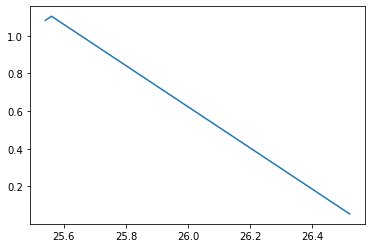

In [54]:
mean = statistics.mean(df.airtime[79])
sd = statistics.stdev(df.airtime[79])
  
plt.plot(df.airtime[79], norm.pdf(df.airtime[79], mean, sd))
plt.show()

In [55]:
df.describe(include="all")

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
count,80434,80434.0,80434,80434.000000,80434.000000,80434.000000,80434.000000,80434.000000,80434.000000,80434.000000,80434.000000,80434,0,80434.000000
unique,240,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7309,0,NaN
top,STA_A1,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[95.46, 95.46]",NaN,NaN
freq,800,NaN,8039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN
mean,NaN,1.0,NaN,32.911350,25.669383,1.006167,1.006167,4.656165,-62.247138,25.357559,7.978417,NaN,NaN,47.259250
std,NaN,0.0,NaN,20.164417,16.527032,1.916768,1.916768,2.130369,5.554748,7.499513,9.273039,NaN,NaN,26.941476
min,NaN,1.0,NaN,-2.472900,-4.909900,0.000000,0.000000,1.000000,-71.460000,-8.630000,0.000000,NaN,NaN,0.190000
25%,NaN,1.0,NaN,15.268150,12.143350,0.000000,0.000000,3.000000,-66.320000,20.090000,2.230000,NaN,NaN,24.290000
50%,NaN,1.0,NaN,31.763050,24.754950,0.000000,0.000000,5.000000,-63.140000,25.150000,5.680000,NaN,NaN,45.917500
75%,NaN,1.0,NaN,47.960850,37.009575,2.000000,2.000000,7.000000,-59.050000,30.267500,10.440000,NaN,NaN,69.558750


In [197]:
# Preprocessing of the SINR column of the dataset
# SINR has 75 null values amd 7400 infinite values

In [42]:
len(np.where(np.isinf(df.SINR))[0])

7400

In [43]:
df3 = df.copy()

In [44]:
out3 = df[df['SINR'].isin([np.inf])]

In [45]:
out3

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
0,AP_A,0,A,10.0,10.0,4,4,5,inf,inf,111.77,"[95.8, 95.69]","[inf, -79.34, -103.96, -119.98, -82.35, -94.85...",95.74500
15,AP_B,0,B,30.0,10.0,6,6,7,inf,inf,111.11,"[95.42, 83.85]","[-79.34, inf, -82.35, -100.95, -91.84, -85.36,...",89.63500
27,AP_C,0,C,50.0,10.0,0,0,3,inf,inf,77.72,"[85.4, 65.61, 51.22, 51.22]","[-100.95, -79.34, inf, -79.34, -108.6, -94.85,...",63.36250
45,AP_D,0,D,70.0,10.0,2,2,3,inf,inf,43.05,"[47.07, 30.64]","[-119.98, -100.95, -82.35, inf, -125.96, -111....",38.85500
58,AP_E,0,E,10.0,30.0,0,0,3,inf,inf,79.87,"[68.65, 33.03, 33.03, 33.03]","[-79.34, -88.83, -108.6, -122.95, inf, -85.36,...",41.93500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87878,AP_F,0,F,30.0,30.0,0,0,7,inf,inf,46.16,"[42.97, 18.74, 18.69, 18.69, 15.41, 15.41, 15....","[-88.83, -82.35, -94.85, -108.6, -79.34, inf, ...",20.09125
87885,AP_G,0,G,50.0,30.0,0,0,7,inf,inf,116.58,"[35.89, 35.16, 35.16, 35.16, 35.16, 35.16, 35....","[-105.59, -91.84, -85.36, -91.84, -100.95, -85...",35.25125
87888,AP_H,0,H,70.0,30.0,0,0,3,inf,inf,84.17,"[57.75, 40.43, 40.43, 40.43]","[-122.95, -108.6, -94.85, -82.35, -119.98, -10...",44.76000
87895,AP_I,0,I,10.0,50.0,4,4,5,inf,inf,20.81,"[82.95, 31.52]","[-100.95, -108.6, -122.83, -133.97, -79.34, -9...",57.23500


In [46]:
df = df.drop(out3.index)

In [47]:
out4 = df[df['SINR'].isin([np.nan])]

In [48]:
out4

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
193,STA_B2,1,B,33.7800,14.6098,0,0,3,-60.71,NaN,0.0,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
194,STA_B3,1,B,28.9946,11.0650,0,0,3,-44.68,NaN,0.0,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
197,STA_B6,1,B,33.2889,11.1512,0,0,3,-54.00,NaN,0.0,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
203,STA_B12,1,B,29.9071,14.3629,0,0,3,-56.69,NaN,0.0,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
569,STA_B7,1,B,22.6258,11.8658,0,0,3,-64.16,NaN,0.0,"[5.31, 1.78, 1.78, 1.78]",NaN,2.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55214,STA_G10,1,G,36.3018,28.1627,0,0,7,-65.38,NaN,0.0,"[1.36, 1.18, 0.68, 0.68, 0.0, 0.0, 0.0, 0.0]",NaN,0.4875
55222,STA_G18,1,G,35.1974,10.4242,0,0,7,-68.20,NaN,0.0,"[1.36, 1.18, 0.68, 0.68, 0.0, 0.0, 0.0, 0.0]",NaN,0.4875
68834,STA_D8,1,D,27.8027,22.5338,0,0,7,-70.95,NaN,0.0,"[3.78, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3]",NaN,3.3600
74682,STA_D8,1,D,21.6706,18.4378,0,0,3,-66.76,NaN,0.0,"[4.38, 2.06, 2.06, 2.06]",NaN,2.6400


In [49]:
df = df.drop(out4.index)

In [50]:
df = df.reset_index(drop=True)

In [51]:
import math

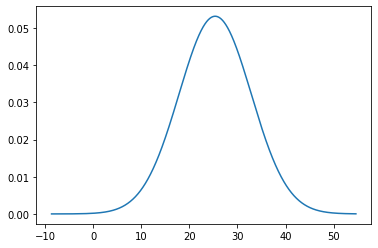

In [56]:
# Poltting the distribution of SINR (non-Nan and non-inf values)
mean = statistics.mean(df.SINR)
sd = statistics.stdev(df.SINR)

plt.plot(df.SINR.sort_values(), norm.pdf(df.SINR.sort_values(), mean, sd))
plt.show()

In [57]:
# SINR is normal. Therefore, can use mean to substitute. 

In [58]:
np.where(df[df.SINR == 0])

(array([], dtype=int64), array([], dtype=int64))

In [59]:
df = df3.copy()

In [60]:
# replacing the inf values with the mean of all values for that BSS

In [61]:
df4 = df.copy()

In [62]:
out3

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
0,AP_A,0,A,10.0,10.0,4,4,5,inf,inf,111.77,"[95.8, 95.69]","[inf, -79.34, -103.96, -119.98, -82.35, -94.85...",95.74500
15,AP_B,0,B,30.0,10.0,6,6,7,inf,inf,111.11,"[95.42, 83.85]","[-79.34, inf, -82.35, -100.95, -91.84, -85.36,...",89.63500
27,AP_C,0,C,50.0,10.0,0,0,3,inf,inf,77.72,"[85.4, 65.61, 51.22, 51.22]","[-100.95, -79.34, inf, -79.34, -108.6, -94.85,...",63.36250
45,AP_D,0,D,70.0,10.0,2,2,3,inf,inf,43.05,"[47.07, 30.64]","[-119.98, -100.95, -82.35, inf, -125.96, -111....",38.85500
58,AP_E,0,E,10.0,30.0,0,0,3,inf,inf,79.87,"[68.65, 33.03, 33.03, 33.03]","[-79.34, -88.83, -108.6, -122.95, inf, -85.36,...",41.93500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87878,AP_F,0,F,30.0,30.0,0,0,7,inf,inf,46.16,"[42.97, 18.74, 18.69, 18.69, 15.41, 15.41, 15....","[-88.83, -82.35, -94.85, -108.6, -79.34, inf, ...",20.09125
87885,AP_G,0,G,50.0,30.0,0,0,7,inf,inf,116.58,"[35.89, 35.16, 35.16, 35.16, 35.16, 35.16, 35....","[-105.59, -91.84, -85.36, -91.84, -100.95, -85...",35.25125
87888,AP_H,0,H,70.0,30.0,0,0,3,inf,inf,84.17,"[57.75, 40.43, 40.43, 40.43]","[-122.95, -108.6, -94.85, -82.35, -119.98, -10...",44.76000
87895,AP_I,0,I,10.0,50.0,4,4,5,inf,inf,20.81,"[82.95, 31.52]","[-100.95, -108.6, -122.83, -133.97, -79.34, -9...",57.23500


In [63]:
out3['sl.no'] = range(0, len(out3))

C:\Users\spoor\AppData\Local\Temp/ipykernel_20736/2857007016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out3['sl.no'] = range(0, len(out3))


In [65]:
out3.index.names = ['index1']

In [66]:
out3.set_index("sl.no", inplace = True)

In [67]:
out3

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
sl.no,,,,,,,,,,,,,,
0,AP_A,0,A,10.0,10.0,4,4,5,inf,inf,111.77,"[95.8, 95.69]","[inf, -79.34, -103.96, -119.98, -82.35, -94.85...",95.74500
1,AP_B,0,B,30.0,10.0,6,6,7,inf,inf,111.11,"[95.42, 83.85]","[-79.34, inf, -82.35, -100.95, -91.84, -85.36,...",89.63500
2,AP_C,0,C,50.0,10.0,0,0,3,inf,inf,77.72,"[85.4, 65.61, 51.22, 51.22]","[-100.95, -79.34, inf, -79.34, -108.6, -94.85,...",63.36250
3,AP_D,0,D,70.0,10.0,2,2,3,inf,inf,43.05,"[47.07, 30.64]","[-119.98, -100.95, -82.35, inf, -125.96, -111....",38.85500
4,AP_E,0,E,10.0,30.0,0,0,3,inf,inf,79.87,"[68.65, 33.03, 33.03, 33.03]","[-79.34, -88.83, -108.6, -122.95, inf, -85.36,...",41.93500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,AP_F,0,F,30.0,30.0,0,0,7,inf,inf,46.16,"[42.97, 18.74, 18.69, 18.69, 15.41, 15.41, 15....","[-88.83, -82.35, -94.85, -108.6, -79.34, inf, ...",20.09125
7396,AP_G,0,G,50.0,30.0,0,0,7,inf,inf,116.58,"[35.89, 35.16, 35.16, 35.16, 35.16, 35.16, 35....","[-105.59, -91.84, -85.36, -91.84, -100.95, -85...",35.25125
7397,AP_H,0,H,70.0,30.0,0,0,3,inf,inf,84.17,"[57.75, 40.43, 40.43, 40.43]","[-122.95, -108.6, -94.85, -82.35, -119.98, -10...",44.76000


In [68]:
indices = out3.index

In [69]:
for i in indices:
    code = out3.wlan_code[i]
    count = 0; j = 1; sum=0
    while((i+j) < len(df4) and df4.wlan_code[i + j] == code and pd.isna(df4.SINR[i+j])!=True):
            sum += df4.SINR[i+j]
            j+=1
    #df4.loc[out3.index, 9] = np.sum([df4.SINR[out3.index+j] for j in range(1,20) if (df4.wlan_code[out3.index + j] == code)])/count
    df4.loc[i, "SINR"] = sum/j

In [70]:
df4.head(20)

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,29.62,111.77,"[95.8, 95.69]","[inf, -79.34, -103.96, -119.98, -82.35, -94.85...",95.745
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,0.00,5.79,"[95.8, 95.69]",NaN,95.745
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,0.00,6.11,"[95.8, 95.69]",NaN,95.745
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,0.00,6.91,"[95.8, 95.69]",NaN,95.745
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,0.00,9.99,"[95.8, 95.69]",NaN,95.745
5,STA_A5,1,A,13.1934,2.3628,4,4,5,-62.42,0.00,9.44,"[95.8, 95.69]",NaN,95.745
6,STA_A6,1,A,17.6857,7.6662,4,4,5,-61.96,0.00,7.25,"[95.8, 95.69]",NaN,95.745
7,STA_A7,1,A,19.4473,8.4359,4,4,5,-64.72,0.00,5.88,"[95.8, 95.69]",NaN,95.745
8,STA_A8,1,A,4.3802,2.0739,4,4,5,-64.96,0.00,7.38,"[95.8, 95.69]",NaN,95.745
9,STA_A9,1,A,16.0383,10.9948,4,4,5,-58.06,0.00,10.91,"[95.8, 95.69]",NaN,95.745


In [71]:
x=df4.loc[df4.SINR != np.nan, 'SINR'].mean()

In [57]:
df4['SINR'] = df4['SINR'].fillna(x)

In [73]:
df4.isnull().sum()

node_code                  0
node_type                  0
wlan_code                  0
x(m)                       0
y(m)                       0
primary_channel            0
min_channel_allowed        0
max_channel_allowed        0
RSSI                       0
SINR                      65
throughput                 0
airtime                    0
interference_map       80509
average_airtime            0
dtype: int64

In [59]:
np.where(np.isnan(df4.SINR))

(array([], dtype=int64),)

In [60]:
df4.loc[190:200]

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
190,STA_A13,1,A,7.2514,15.5418,0,0,1,-58.20,0.0,11.60,"[94.17, 78.81]",NaN,86.4900
191,AP_B,0,B,30.0000,10.0000,0,0,3,inf,0.0,1.61,"[1.08, 0.69, 0.69, 0.69]","[-79.34, inf, -79.34, -103.96, -88.83, -79.34,...",0.7875
192,STA_B1,1,B,37.7721,10.1978,0,0,3,-64.48,0.0,0.08,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
193,STA_B2,1,B,33.7800,14.6098,0,0,3,-60.71,0.0,0.00,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
194,STA_B3,1,B,28.9946,11.0650,0,0,3,-44.68,0.0,0.00,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
195,STA_B4,1,B,34.1642,3.9074,0,0,3,-63.71,0.0,0.23,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
196,STA_B5,1,B,32.5888,2.8940,0,0,3,-64.07,0.0,0.23,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
197,STA_B6,1,B,33.2889,11.1512,0,0,3,-54.00,0.0,0.00,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
198,STA_B7,1,B,24.4104,1.9492,0,0,3,-68.12,0.0,0.00,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875
199,STA_B8,1,B,30.3436,3.6623,0,0,3,-61.57,0.0,0.31,"[1.08, 0.69, 0.69, 0.69]",NaN,0.7875


In [ ]:
# Creating the average interference column
# Remove the inf values in the interference map
# For STAs, the interference map(NaN) is replaced by 0

In [ ]:
df4.interference_map = [df4.interference_map[i].remove(np.inf) if df4.node_type[i]==0 else np.nan for i in range(1,len(df4))]

In [62]:
df4.interference_map[0].remove(np.inf)


In [63]:
df4

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,29.62,111.77,"[95.8, 95.69]","[-79.34, -103.96, -119.98, -82.35, -94.85, -11...",95.745
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,0.00,5.79,"[95.8, 95.69]",NaN,95.745
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,0.00,6.11,"[95.8, 95.69]",NaN,95.745
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,0.00,6.91,"[95.8, 95.69]",NaN,95.745
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,0.00,9.99,"[95.8, 95.69]",NaN,95.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220


In [64]:
df['average_interference'] = df.apply(lambda row: np.mean(row.interference_map), axis=1)

In [65]:
out5 = df4[df4['node_type'].isin([0])]

In [66]:
out5

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
0,AP_A,0,A,10.0,10.0,4,4,5,inf,29.62,111.77,"[95.8, 95.69]","[-79.34, -103.96, -119.98, -82.35, -94.85, -11...",95.74500
15,AP_B,0,B,30.0,10.0,6,6,7,inf,0.00,111.11,"[95.42, 83.85]","[-79.34, -82.35, -100.95, -91.84, -85.36, -94....",89.63500
27,AP_C,0,C,50.0,10.0,0,0,3,inf,0.00,77.72,"[85.4, 65.61, 51.22, 51.22]","[-100.95, -79.34, -79.34, -108.6, -94.85, -85....",63.36250
45,AP_D,0,D,70.0,10.0,2,2,3,inf,0.00,43.05,"[47.07, 30.64]","[-119.98, -100.95, -82.35, -125.96, -111.61, -...",38.85500
58,AP_E,0,E,10.0,30.0,0,0,3,inf,0.00,79.87,"[68.65, 33.03, 33.03, 33.03]","[-79.34, -88.83, -108.6, -122.95, -85.36, -106...",41.93500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87878,AP_F,0,F,30.0,30.0,0,0,7,inf,inf,46.16,"[42.97, 18.74, 18.69, 18.69, 15.41, 15.41, 15....","[-88.83, -82.35, -94.85, -108.6, -79.34, -85.3...",20.09125
87885,AP_G,0,G,50.0,30.0,0,0,7,inf,inf,116.58,"[35.89, 35.16, 35.16, 35.16, 35.16, 35.16, 35....","[-105.59, -91.84, -85.36, -91.84, -100.95, -85...",35.25125
87888,AP_H,0,H,70.0,30.0,0,0,3,inf,inf,84.17,"[57.75, 40.43, 40.43, 40.43]","[-122.95, -108.6, -94.85, -82.35, -119.98, -10...",44.76000
87895,AP_I,0,I,10.0,50.0,4,4,5,inf,inf,20.81,"[82.95, 31.52]","[-100.95, -108.6, -122.83, -133.97, -79.34, -9...",57.23500


In [67]:
for i in out5.interference_map:
    for x in i:
        if math.isinf(x):
            print(i)

In [68]:
df4['average_interference'] = df4.apply(lambda row: np.mean(row.interference_map), axis=1)

In [69]:
df4

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime,average_interference
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,29.62,111.77,"[95.8, 95.69]","[-79.34, -103.96, -119.98, -82.35, -94.85, -11...",95.745,-107.399091
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,0.00,5.79,"[95.8, 95.69]",NaN,95.745,NaN
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,0.00,6.11,"[95.8, 95.69]",NaN,95.745,NaN
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,0.00,6.91,"[95.8, 95.69]",NaN,95.745,NaN
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,0.00,9.99,"[95.8, 95.69]",NaN,95.745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,NaN
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,NaN
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,NaN
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,NaN


In [70]:
df4.interference_map[0]

[-79.34,
 -103.96,
 -119.98,
 -82.35,
 -94.85,
 -111.61,
 -122.95,
 -103.96,
 -111.61,
 -119.82,
 -130.96]

In [71]:
df4['average_interference'] = df4['average_interference'].fillna(0)

In [72]:
df4

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime,average_interference
0,AP_A,0,A,10.0000,10.0000,4,4,5,inf,29.62,111.77,"[95.8, 95.69]","[-79.34, -103.96, -119.98, -82.35, -94.85, -11...",95.745,-107.399091
1,STA_A1,1,A,0.0713,10.8079,4,4,5,-65.37,0.00,5.79,"[95.8, 95.69]",NaN,95.745,0.000000
2,STA_A2,1,A,1.9627,4.1427,4,4,5,-65.35,0.00,6.11,"[95.8, 95.69]",NaN,95.745,0.000000
3,STA_A3,1,A,13.7849,16.7538,4,4,5,-61.41,0.00,6.91,"[95.8, 95.69]",NaN,95.745,0.000000
4,STA_A4,1,A,6.7112,1.7487,4,4,5,-63.52,0.00,9.99,"[95.8, 95.69]",NaN,95.745,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.17,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.61,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.77,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.70,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000


In [73]:
df4.isna().sum()

node_code                   0
node_type                   0
wlan_code                   0
x(m)                        0
y(m)                        0
primary_channel             0
min_channel_allowed         0
max_channel_allowed         0
RSSI                        0
SINR                        0
throughput                  0
airtime                     0
interference_map        80509
average_airtime             0
average_interference        0
dtype: int64

In [ ]:
# Replacing the inf RSSI values with the mean of the RSSI values for that particular BSS

In [74]:
out3

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime
sl.no,,,,,,,,,,,,,,
0,AP_A,0,A,10.0,10.0,4,4,5,inf,inf,111.77,"[95.8, 95.69]","[-79.34, -103.96, -119.98, -82.35, -94.85, -11...",95.74500
1,AP_B,0,B,30.0,10.0,6,6,7,inf,inf,111.11,"[95.42, 83.85]","[-79.34, -82.35, -100.95, -91.84, -85.36, -94....",89.63500
2,AP_C,0,C,50.0,10.0,0,0,3,inf,inf,77.72,"[85.4, 65.61, 51.22, 51.22]","[-100.95, -79.34, -79.34, -108.6, -94.85, -85....",63.36250
3,AP_D,0,D,70.0,10.0,2,2,3,inf,inf,43.05,"[47.07, 30.64]","[-119.98, -100.95, -82.35, -125.96, -111.61, -...",38.85500
4,AP_E,0,E,10.0,30.0,0,0,3,inf,inf,79.87,"[68.65, 33.03, 33.03, 33.03]","[-79.34, -88.83, -108.6, -122.95, -85.36, -106...",41.93500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,AP_F,0,F,30.0,30.0,0,0,7,inf,inf,46.16,"[42.97, 18.74, 18.69, 18.69, 15.41, 15.41, 15....","[-88.83, -82.35, -94.85, -108.6, -79.34, -85.3...",20.09125
7396,AP_G,0,G,50.0,30.0,0,0,7,inf,inf,116.58,"[35.89, 35.16, 35.16, 35.16, 35.16, 35.16, 35....","[-105.59, -91.84, -85.36, -91.84, -100.95, -85...",35.25125
7397,AP_H,0,H,70.0,30.0,0,0,3,inf,inf,84.17,"[57.75, 40.43, 40.43, 40.43]","[-122.95, -108.6, -94.85, -82.35, -119.98, -10...",44.76000


In [75]:
for i in indices:
    code = out3.wlan_code[i]
    count = 0; j = 1; sum=0
    while((i+j) < len(df4) and df4.wlan_code[i + j] == code):
            sum += df4.RSSI[i+j]
            j+=1
    #df4.loc[out3.index, 9] = np.sum([df4.SINR[out3.index+j] for j in range(1,20) if (df4.wlan_code[out3.index + j] == code)])/count
    df4.loc[i, "RSSI"] = sum/j

In [76]:
df4

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,airtime,interference_map,average_airtime,average_interference
0,AP_A,0,A,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,"[95.8, 95.69]","[-79.34, -103.96, -119.98, -82.35, -94.85, -11...",95.745,-107.399091
1,STA_A1,1,A,0.0713,10.8079,4,4,5,0.000000,0.00,5.79,"[95.8, 95.69]",NaN,95.745,0.000000
2,STA_A2,1,A,1.9627,4.1427,4,4,5,0.000000,0.00,6.11,"[95.8, 95.69]",NaN,95.745,0.000000
3,STA_A3,1,A,13.7849,16.7538,4,4,5,0.000000,0.00,6.91,"[95.8, 95.69]",NaN,95.745,0.000000
4,STA_A4,1,A,6.7112,1.7487,4,4,5,0.000000,0.00,9.99,"[95.8, 95.69]",NaN,95.745,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,"[81.21, 79.61, 79.61, 79.61, 78.43, 78.43, 78....",NaN,79.220,0.000000


In [77]:
df5 = df4.drop(['airtime', 'interference_map'], axis=1)

In [78]:
df5

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference
0,AP_A,0,A,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091
1,STA_A1,1,A,0.0713,10.8079,4,4,5,0.000000,0.00,5.79,95.745,0.000000
2,STA_A2,1,A,1.9627,4.1427,4,4,5,0.000000,0.00,6.11,95.745,0.000000
3,STA_A3,1,A,13.7849,16.7538,4,4,5,0.000000,0.00,6.91,95.745,0.000000
4,STA_A4,1,A,6.7112,1.7487,4,4,5,0.000000,0.00,9.99,95.745,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000


In [402]:
df5.to_csv('finaldatabase1.csv')

In [403]:
# Heatmaps and correlations

In [405]:
import seaborn as sns

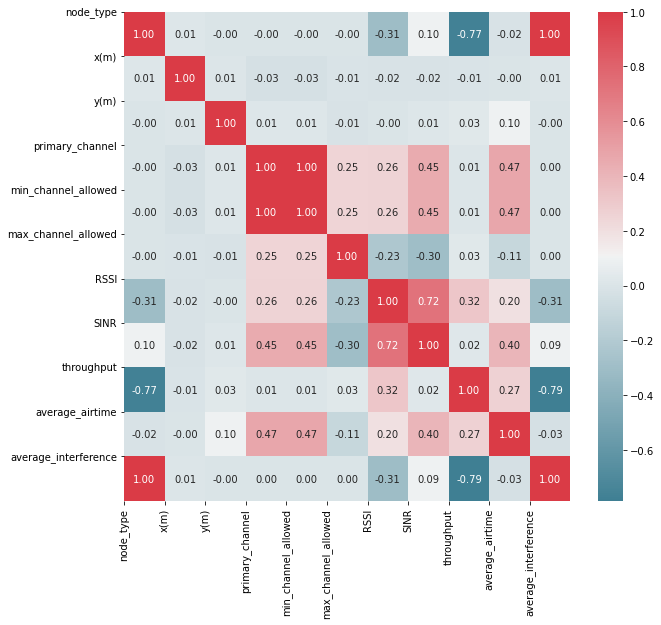

In [410]:
def heat_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 9))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)

    plt.show()

heat_map(df5)

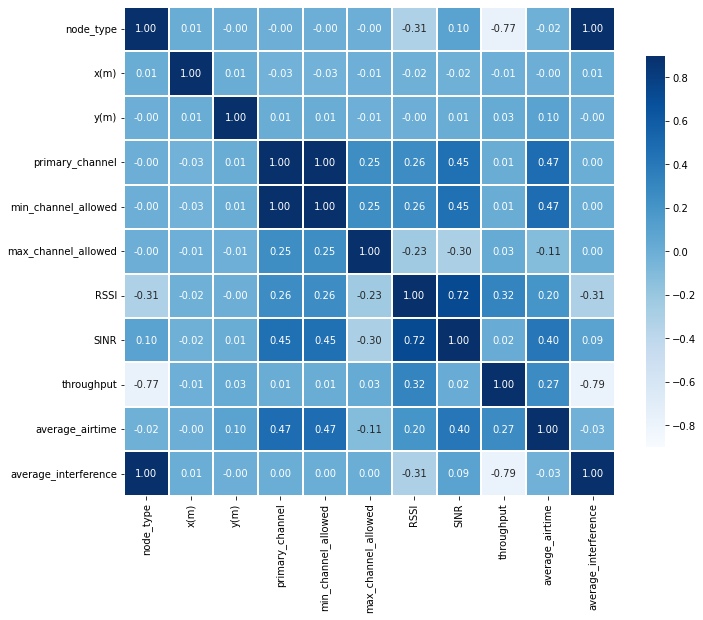

In [415]:
fig, ax = plt.subplots(figsize=(11, 9))
corr = df5.corr()
sns.heatmap(corr, cmap="Blues", vmin= -0.9, vmax=0.9,
           linewidth=0.3, cbar_kws={"shrink": .8}, annot=True, fmt=".2f")
plt.show()

In [416]:
# tokenize the wlan_code column and create the wlan_code_index column

In [80]:
def char_position(letter):
    return ord(letter) - 65

In [81]:
import string
df5['wlan_code_index'] = [char_position(i) for i in df5.wlan_code]

In [82]:
df5

,node_code,node_type,wlan_code,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index
0,AP_A,0,A,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0
1,STA_A1,1,A,0.0713,10.8079,4,4,5,0.000000,0.00,5.79,95.745,0.000000,0
2,STA_A2,1,A,1.9627,4.1427,4,4,5,0.000000,0.00,6.11,95.745,0.000000,0
3,STA_A3,1,A,13.7849,16.7538,4,4,5,0.000000,0.00,6.91,95.745,0.000000,0
4,STA_A4,1,A,6.7112,1.7487,4,4,5,0.000000,0.00,9.99,95.745,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,J,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9
87905,STA_J5,1,J,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9
87906,STA_J6,1,J,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9
87907,STA_J7,1,J,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9


In [83]:
df5.drop('wlan_code', axis=1, inplace=True)

In [84]:
df5

,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index
0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0
1,STA_A1,1,0.0713,10.8079,4,4,5,0.000000,0.00,5.79,95.745,0.000000,0
2,STA_A2,1,1.9627,4.1427,4,4,5,0.000000,0.00,6.11,95.745,0.000000,0
3,STA_A3,1,13.7849,16.7538,4,4,5,0.000000,0.00,6.91,95.745,0.000000,0
4,STA_A4,1,6.7112,1.7487,4,4,5,0.000000,0.00,9.99,95.745,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9
87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9
87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9
87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9


In [564]:
test_set = 9831
df_train = df5[:len(df5) - test_set]
df_test = df5[len(df5) - test_set: len(df5)]

In [566]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78078 entries, 0 to 78077
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   node_code             78078 non-null  object 
 1   node_type             78078 non-null  int64  
 2   x(m)                  78078 non-null  float64
 3   y(m)                  78078 non-null  float64
 4   primary_channel       78078 non-null  int64  
 5   min_channel_allowed   78078 non-null  int64  
 6   max_channel_allowed   78078 non-null  int64  
 7   RSSI                  78078 non-null  float64
 8   SINR                  78078 non-null  float64
 9   throughput            78078 non-null  float64
 10  average_airtime       78078 non-null  float64
 11  average_interference  78078 non-null  float64
 12  wlan_code_index       78078 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9831 entries, 

In [426]:
df5.to_csv('fin-dataset_2.csv')

Text(0.5, 1.0, 'Primary channels')

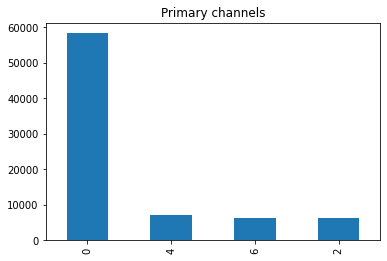

In [568]:
# Bar graph of the primary channel occupied by each BSS
df_train.primary_channel.value_counts().head(10).plot.bar()
plt.title("Primary channels")

In [576]:
a = np.where(df_train.primary_channel == 0)[0]
print(str(float(len(a))/len(df_train)) + " of the values are 0")

0.7467916698685929 of the values are 0


In [575]:
a = np.where(df_train.RSSI == 0)[0]
print(str(float(len(a))/len(df_train)) + " of the values are 0")

0.0 of the values are 0


In [574]:
a = np.where(df_train.RSSI < 0)[0]
print(str(float(len(a))/len(df_train)*100) + " of the values are less than 0")

100.0 of the values are less than 0


In [ ]:
# Thus all the RSSI values are less than 0

In [579]:
a = np.where(df_train.SINR == 0)[0]
print(str(float(len(a))/len(df_train)*100) + " of the values are 0")
print(a)

0.005123082046158969 of the values are 0
[15764 32283 32977 39921]


In [427]:
# Distribution plots

C:\Users\spoor\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\spoor\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


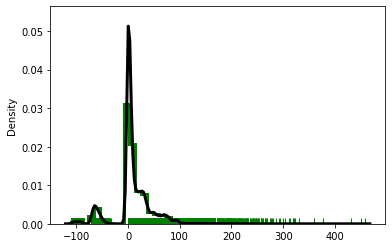

In [563]:
ax = sns.distplot(df_test.iloc[:, 1:14], rug=True, rug_kws={"color":"g"}, kde_kws={"color":"k", "lw":3, "label":"KDE"},
                 hist_kws = {"histtype":"step", "linewidth":3, "alpha":1, "color":"g"})

In [428]:
# Count Plots

In [429]:
# Box Plots

<AxesSubplot:>

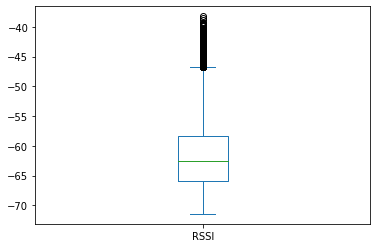

In [582]:
df_train.RSSI.plot(kind = 'box')

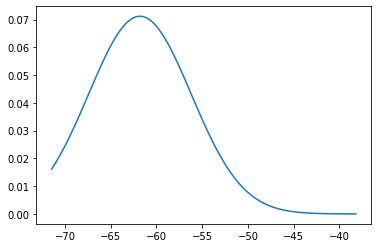

In [583]:
mean = statistics.mean(df_train.RSSI)
sd = statistics.stdev(df_train.RSSI)

plt.plot(df_train.RSSI.sort_values(), norm.pdf(df_train.RSSI.sort_values(), mean, sd))
plt.show()

In [584]:
q1, q3= np.percentile(df_train.RSSI,[25,75])
print(q1, q3)

-65.91 -58.27


In [585]:
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

-77.36999999999999 -46.81000000000002


In [586]:
outliers = []
for i in range(len(df_train)):
    if(df_train.RSSI[i] < lower_bound or df_train.RSSI[i] > upper_bound):
        outliers.append(df_train.RSSI[i])

In [587]:
len(outliers)

884

<AxesSubplot:>

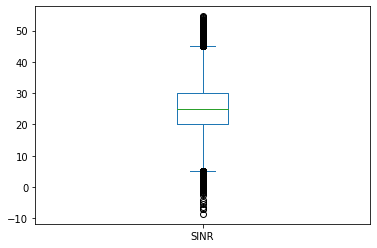

In [588]:
df_train.SINR.plot(kind = 'box')

<AxesSubplot:xlabel='primary_channel', ylabel='RSSI'>

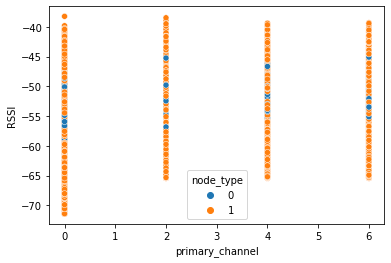

In [589]:
sns.scatterplot(x=df_train.primary_channel, y=df_train.RSSI, data=df_train, hue=df_train.node_type)

In [ ]:
# Adding the deployment column

In [7]:
deployment = []

In [8]:
# Merging the additional column - deployment to dataframe
add_df = pd.read_csv("input_file.csv")
add_df_test = pd.read_csv("test_input_file.csv")

In [9]:
deployment = [add_df.deployment[i] for i in range(len(add_df))]

In [10]:
for i in range(len(add_df_test)):
    deployment.append(add_df_test.deployment[i] + 600)

In [11]:
len(deployment)

87909

In [503]:
df6 = df5.assign(deployment = deployment)

In [504]:
df6

,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0
1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0
2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0
3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0
4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0
87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0
87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0
87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0


In [494]:
# Relationship between primary channel and signal strength for 1 deployment

<AxesSubplot:xlabel='primary_channel', ylabel='RSSI'>

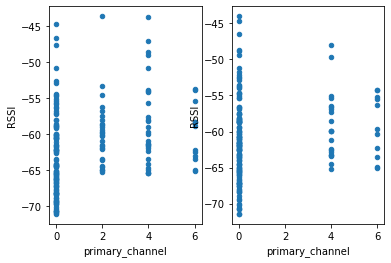

In [517]:
fig,axes = plt.subplots(1,2)

df6.loc[df6['deployment'].eq(0)].plot.scatter(x='primary_channel',y='RSSI', ax=axes[0])
df6.loc[df6['deployment'].eq(1)].plot.scatter(x='primary_channel',y='RSSI', ax=axes[1])

<AxesSubplot:>

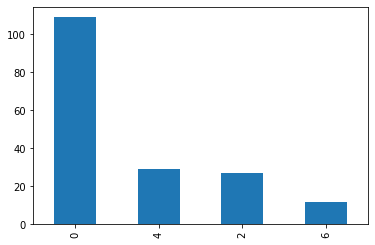

In [511]:
df6.loc[df6['deployment'].eq(0)].primary_channel.value_counts().plot(kind="bar")

In [ ]:
# This shows that majority of the BSSs are using primary channel 0, in a deployment

In [528]:
# Relationship between channels and RSSI

In [533]:
df7 = df6.loc[0:176, :]

In [534]:
df7

,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0
1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0
2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0
3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0
4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,STA_L9,1,67.5890,53.8409,4,4,5,-54.150000,40.36,11.67,94.855,0.000000,11,0.0
173,STA_L10,1,71.2809,56.7744,4,4,5,-59.720000,34.97,12.24,94.855,0.000000,11,0.0
174,STA_L11,1,66.5955,55.6424,4,4,5,-59.080000,35.40,11.83,94.855,0.000000,11,0.0
175,STA_L12,1,63.0750,43.8630,4,4,5,-64.170000,29.68,8.46,94.855,0.000000,11,0.0


In [549]:
# Plotting deployments according to their position

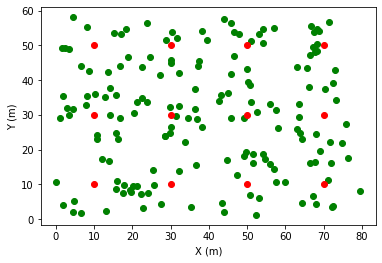

In [552]:
out7 = df7[df7["node_type"] == 0]
df7 = df7.drop(out7.index)
plt.scatter(df7["x(m)"], df7["y(m)"], c="green")
plt.scatter(out7["x(m)"], out7["y(m)"], c="red")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.show()

In [554]:
test_set = 9831
df_train = df5[:len(df5) - test_set]
df_test = df5[len(df5) - test_set: len(df5)]

In [2]:
df8 = pd.read_csv("fin-dataset_2.csv")

NameError: name 'pd' is not defined

In [3]:
df8 = df8.assign(deployment = deployment)

NameError: name 'df8' is not defined

In [13]:
df8

,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0
1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0
2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0
3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0
4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0
87905,87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0
87906,87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0
87907,87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0


In [14]:
df8[78070:78093]

,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
78070,78070,STA_H2,1,37.8595,29.9742,0,0,3,-67.310,18.6600,11.21,48.61500,0.000000,7,599.0
78071,78071,STA_H3,1,26.8084,33.2842,0,0,3,-54.450,27.6600,12.98,48.61500,0.000000,7,599.0
78072,78072,STA_H4,1,35.6717,40.3260,0,0,3,-64.490,25.3300,12.44,48.61500,0.000000,7,599.0
78073,78073,STA_H5,1,24.1359,33.5025,0,0,3,-60.910,20.9800,3.99,48.61500,0.000000,7,599.0
78074,78074,STA_H6,1,31.7151,27.9136,0,0,3,-63.540,18.5400,9.60,48.61500,0.000000,7,599.0
78075,78075,STA_H7,1,25.6285,29.0904,0,0,3,-63.650,16.5100,2.92,48.61500,0.000000,7,599.0
78076,78076,STA_H8,1,31.1102,32.1255,0,0,3,-52.590,31.7300,14.05,48.61500,0.000000,7,599.0
78077,78077,STA_H9,1,26.2755,44.0099,0,0,3,-68.030,20.6700,7.76,48.61500,0.000000,7,599.0
78078,78078,AP_A,0,10.0000,10.0000,0,0,3,-40.190,28.5375,257.28,70.23750,-104.103333,0,600.0
78079,78079,STA_A1,1,12.4370,12.5350,0,0,3,-54.100,37.3900,93.39,70.23750,0.000000,0,600.0


In [14]:
df8.to_csv("deployment-avg_int.csv")

In [15]:
out2 = df8[df8["node_type"] == 0]
out2

,Unnamed: 0,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
0,0,AP_A,0,10.0,10.0,4,4,5,-58.226667,29.620000,111.77,95.74500,-107.399091,0,0.0
15,15,AP_B,0,30.0,10.0,6,6,7,-55.365000,30.275000,111.11,89.63500,-98.296364,1,0.0
27,27,AP_C,0,50.0,10.0,0,0,3,-60.646111,21.308333,77.72,63.36250,-98.022727,2,0.0
45,45,AP_D,0,70.0,10.0,2,2,3,-54.633077,29.581538,43.05,38.85500,-107.399091,3,0.0
58,58,AP_E,0,10.0,30.0,0,0,3,-58.994444,25.089444,79.87,41.93500,-101.889091,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87878,87878,AP_F,0,30.0,30.0,0,0,7,-55.834286,11.962857,46.16,20.09125,-90.831111,5,799.0
87885,87885,AP_G,0,50.0,30.0,0,0,7,-39.920000,16.840000,116.58,35.25125,-93.747778,6,799.0
87888,87888,AP_H,0,70.0,30.0,0,0,3,-53.174286,22.284286,84.17,44.76000,-106.180000,7,799.0
87895,87895,AP_I,0,10.0,50.0,4,4,5,-50.328000,21.276000,20.81,57.23500,-107.052222,8,799.0


In [23]:
out3 = out2.reset_index(drop=True)

In [ ]:
# Add the deployment column to the dataset containing the interference map columns

In [19]:
df_1 = pd.read_csv("full_dataset_with_int_map.csv")
df_1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,wlan_code_index,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,average_airtime,throughput
0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,0,10.0,10.0,4,4,5,-58.226667,29.620000,95.74500,111.77
1,1,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,-108.60,...,1,30.0,10.0,6,6,7,-55.365000,30.275000,89.63500,111.11
2,2,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,-119.82,...,2,50.0,10.0,0,0,3,-60.646111,21.308333,63.36250,77.72
3,3,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,-133.97,...,3,70.0,10.0,2,2,3,-54.633077,29.581538,38.85500,43.05
4,4,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,-82.35,...,4,10.0,30.0,0,0,3,-58.994444,25.089444,41.93500,79.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,-88.83,...,5,30.0,30.0,0,0,7,-55.834286,11.962857,20.09125,46.16
7396,7396,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,-105.59,...,6,50.0,30.0,0,0,7,-39.920000,16.840000,35.25125,116.58
7397,7397,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,-122.95,...,7,70.0,30.0,0,0,3,-53.174286,22.284286,44.76000,84.17
7398,7398,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,10000.00,...,8,10.0,50.0,4,4,5,-50.328000,21.276000,57.23500,20.81


In [26]:
df_new = df_1.merge(out3["deployment"], left_index=True, right_index=True)

In [27]:
df_new.to_csv("deployment_with_int_map.csv")

In [4]:
out2 = df1[df1["node_type"] == 0]

In [ ]:
# Add int map to STAs as well
# RSSI for the interference of AP and STA of the same BSS
# 0 for the interference of AP and STA of different BSS

In [5]:
# Include STAs in dataset
df1 = pd.read_csv("deployment-avg_int.csv")
#out2 = df1[df1["node_type"] == 0]
df2 = pd.read_csv("deployment_with_int_map.csv")
out2 = df2.assign(index=out2.index)

out2

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,average_airtime,throughput,deployment,index
0,0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,...,10.0,4,4,5,-58.226667,29.620000,95.74500,111.77,0.0,0
1,1,1,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,...,10.0,6,6,7,-55.365000,30.275000,89.63500,111.11,0.0,15
2,2,2,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,...,10.0,0,0,3,-60.646111,21.308333,63.36250,77.72,0.0,27
3,3,3,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,...,10.0,2,2,3,-54.633077,29.581538,38.85500,43.05,0.0,45
4,4,4,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,...,30.0,0,0,3,-58.994444,25.089444,41.93500,79.87,0.0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,7395,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,...,30.0,0,0,7,-55.834286,11.962857,20.09125,46.16,799.0,87878
7396,7396,7396,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,...,30.0,0,0,7,-39.920000,16.840000,35.25125,116.58,799.0,87885
7397,7397,7397,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,...,30.0,0,0,3,-53.174286,22.284286,44.76000,84.17,799.0,87888
7398,7398,7398,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,...,50.0,4,4,5,-50.328000,21.276000,57.23500,20.81,799.0,87895


In [6]:
out3 = out2.set_index("index")
out3

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,average_airtime,throughput,deployment
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,...,10.0,10.0,4,4,5,-58.226667,29.620000,95.74500,111.77,0.0
15,1,1,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,...,30.0,10.0,6,6,7,-55.365000,30.275000,89.63500,111.11,0.0
27,2,2,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,...,50.0,10.0,0,0,3,-60.646111,21.308333,63.36250,77.72,0.0
45,3,3,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,...,70.0,10.0,2,2,3,-54.633077,29.581538,38.85500,43.05,0.0
58,4,4,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,...,10.0,30.0,0,0,3,-58.994444,25.089444,41.93500,79.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87878,7395,7395,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,...,30.0,30.0,0,0,7,-55.834286,11.962857,20.09125,46.16,799.0
87885,7396,7396,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,...,50.0,30.0,0,0,7,-39.920000,16.840000,35.25125,116.58,799.0
87888,7397,7397,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,...,70.0,30.0,0,0,3,-53.174286,22.284286,44.76000,84.17,799.0


In [ ]:
list_of_0 = [0 for i in range(12)]
int_map = []
for j in range(len(df1)):
    if(all(j != m for m in out2["index"])):
        print("1:", j)
        int_map.append(list_of_0)
    else:
        print("2:", j)
        int_map.append(out2.iloc[out2.index[out2["index"] == j], 2:14].values.tolist()[0])

In [7]:
df_new = df1.merge(df2.iloc[:, :12], left_index=True, right_index=True)

In [8]:
df_new

,Unnamed: 0_x,Unnamed: 0.1_x,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,...,0,1,2,3,4,5,6,7,8,9
0,0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,...,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,-111.61
1,1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,...,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,-108.60,-106.97
2,2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,...,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,-119.82,-111.61
3,3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,...,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,-133.97,-122.83
4,4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,...,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,-82.35,-94.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,7395,STA_J14,1,25.2855,53.7949,0,0,3,-60.910000,...,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,-88.83,-85.36
7396,7396,7396,STA_J15,1,31.4620,46.7332,0,0,3,-54.310000,...,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,-105.59,-94.85
7397,7397,7397,STA_J16,1,31.6150,58.5546,0,0,3,-66.210000,...,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,-122.95,-111.61
7398,7398,7398,STA_J17,1,27.2448,53.2491,0,0,3,-56.390000,...,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,10000.00,-85.36


In [11]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime', 'throughput', 'deployment'],
      dtype='object')

In [30]:
df_new = pd.read_csv("deployment-avg_int.csv")
df_new

,Unnamed: 0,Unnamed: 0.1,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
0,0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0
1,1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0
2,2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0
3,3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0
4,4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0
87905,87905,87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0
87906,87906,87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0
87907,87907,87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0


In [31]:
df_new = df_new.assign(int_map = int_map)
df_new

,Unnamed: 0,Unnamed: 0.1,node_code,node_type,x(m),y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment,int_map
0,0,0,AP_A,0,10.0000,10.0000,4,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0,"[10000.0, -79.34, -103.96, -119.98, -82.35, -9..."
1,1,1,STA_A1,1,0.0713,10.8079,4,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2,2,STA_A2,1,1.9627,4.1427,4,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3,3,STA_A3,1,13.7849,16.7538,4,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,4,4,STA_A4,1,6.7112,1.7487,4,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,87904,STA_J4,1,22.4444,46.9925,0,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87905,87905,87905,STA_J5,1,32.0104,51.2173,0,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87906,87906,87906,STA_J6,1,34.1608,48.5987,0,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87907,87907,87907,STA_J7,1,31.8977,54.3313,0,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [52]:
new_df = pd.DataFrame(df_new['int_map'].tolist())

In [53]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,10000.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,-111.61,-119.82,-130.96
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
87904,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
87905,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
87906,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
87907,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [54]:

new_df = pd.concat([new_df, df_new], axis=1)

In [55]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment,int_map
0,10000.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,-111.61,...,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0,"[10000.0, -79.34, -103.96, -119.98, -82.35, -9..."
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87905,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87906,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87907,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [38]:
out2

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,y(m),primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,average_airtime,throughput,deployment,index
0,0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,...,10.0,4,4,5,-58.226667,29.620000,95.74500,111.77,0.0,0
1,1,1,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,...,10.0,6,6,7,-55.365000,30.275000,89.63500,111.11,0.0,15
2,2,2,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,...,10.0,0,0,3,-60.646111,21.308333,63.36250,77.72,0.0,27
3,3,3,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,...,10.0,2,2,3,-54.633077,29.581538,38.85500,43.05,0.0,45
4,4,4,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,...,30.0,0,0,3,-58.994444,25.089444,41.93500,79.87,0.0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,7395,7395,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,...,30.0,0,0,7,-55.834286,11.962857,20.09125,46.16,799.0,87878
7396,7396,7396,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,...,30.0,0,0,7,-39.920000,16.840000,35.25125,116.58,799.0,87885
7397,7397,7397,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,...,30.0,0,0,3,-53.174286,22.284286,44.76000,84.17,799.0,87888
7398,7398,7398,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,...,50.0,4,4,5,-50.328000,21.276000,57.23500,20.81,799.0,87895


In [39]:
out2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)',
       'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'RSSI',
       'SINR', 'average_airtime', 'throughput', 'deployment', 'index'],
      dtype='object')

In [58]:
new_df_1 = new_df.copy()

In [ ]:
for i in range(len(out2)-1):
    for j in range(1, out2["index"][i+1] - out2["index"][i]):
        new_df_1.iloc[out2["index"][i] + j, out2["wlan_code_index"][i]] = new_df_1.RSSI[out2["index"][i] + j]
        print(out2["index"][i], out2["wlan_code_index"][i])

In [76]:
# from 87900 to 87909
for j in range(1, len(new_df_1) - out2["index"][-1:].values[0]):
    new_df_1.iloc[out2["index"][-1:].values[0] + j, out2["wlan_code_index"][-1:].values[0]] = new_df_1.RSSI[out2["index"][-1:].values[0] + j]
    print(out2["index"][-1:].values[0], out2["wlan_code_index"][-1:].values[0])

87900 9
87900 9
87900 9
87900 9
87900 9
87900 9
87900 9
87900 9


In [78]:
new_df_1

,0,1,2,3,4,5,6,7,8,9,...,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment,int_map
0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,-111.61,...,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0,"[10000.0, -79.34, -103.96, -119.98, -82.35, -9..."
1,-65.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,-65.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,-61.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,-63.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-68.17,...,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-52.61,...,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-59.77,...,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87907,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-60.70,...,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [80]:
new_df_1.to_csv("sta-int_map.csv")

In [43]:
df = pd.read_csv("sta-int_map.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment,int_map
0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,5,-58.226667,29.62,111.77,95.745,-107.399091,0,0.0,"[10000.0, -79.34, -103.96, -119.98, -82.35, -9..."
1,1,-65.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-65.370000,29.36,5.79,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2,-65.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-65.350000,29.48,6.11,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3,-61.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-61.410000,31.97,6.91,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,4,-63.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4,5,-63.520000,31.26,9.99,95.745,0.000000,0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87904,87904,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-68.170000,11.06,3.30,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87905,87905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-52.610000,32.17,43.24,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87906,87906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-59.770000,24.86,37.02,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
87907,87907,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,7,-60.700000,23.68,36.86,79.220,0.000000,9,799.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [4]:
out2 = df[df["node_type"] == 0]
out2.drop(["int_map"], axis=1)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,primary_channel,min_channel_allowed,max_channel_allowed,RSSI,SINR,throughput,average_airtime,average_interference,wlan_code_index,deployment
0,0,10000.00,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,4,5,-58.226667,29.620000,111.77,95.74500,-107.399091,0,0.0
15,15,-79.34,10000.00,-82.35,-100.95,-91.84,-85.36,-94.85,-105.59,-108.60,...,6,6,7,-55.365000,30.275000,111.11,89.63500,-98.296364,1,0.0
27,27,-100.95,-79.34,10000.00,-79.34,-108.60,-94.85,-85.36,-88.83,-119.82,...,0,0,3,-60.646111,21.308333,77.72,63.36250,-98.022727,2,0.0
45,45,-119.98,-100.95,-82.35,10000.00,-125.96,-111.61,-94.85,-79.34,-133.97,...,2,2,3,-54.633077,29.581538,43.05,38.85500,-107.399091,3,0.0
58,58,-79.34,-88.83,-108.60,-122.95,10000.00,-85.36,-106.97,-119.98,-82.35,...,0,0,3,-58.994444,25.089444,79.87,41.93500,-101.889091,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87878,87878,-88.83,-82.35,-94.85,-108.60,-79.34,10000.00,-85.36,-103.96,-88.83,...,0,0,7,-55.834286,11.962857,46.16,20.09125,-90.831111,5,799.0
87885,87885,-105.59,-91.84,-85.36,-91.84,-100.95,-85.36,10000.00,-82.35,-105.59,...,0,0,7,-39.920000,16.840000,116.58,35.25125,-93.747778,6,799.0
87888,87888,-122.95,-108.60,-94.85,-82.35,-119.98,-106.97,-85.36,10000.00,-122.95,...,0,0,3,-53.174286,22.284286,84.17,44.76000,-106.180000,7,799.0
87895,87895,-100.95,-108.60,-122.83,-133.97,-79.34,-94.85,-111.61,-125.96,10000.00,...,4,4,5,-50.328000,21.276000,20.81,57.23500,-107.052222,8,799.0


In [5]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'node_code', 'node_type',
       'x(m)', 'y(m)', 'primary_channel', 'min_channel_allowed',
       'max_channel_allowed', 'RSSI', 'SINR', 'throughput', 'average_airtime',
       'average_interference', 'wlan_code_index', 'deployment', 'int_map'],
      dtype='object')